# Topic 4 Advanced Deep Learning Models


## Topic 4.1 Convolutional Neural Networks (CNN)


### CNN on MNIST dataset

In [ ]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [ ]:
# Add a channels dimension
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

In [ ]:
x_train.shape

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=(28, 28,1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10,validation_data=(x_test, y_test))

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epoch = range(len(loss))

import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epoch,loss,label='loss')
plt.plot(epoch,val_loss,label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epoch,acc,label='acc')
plt.plot(epoch,val_acc,label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
loss,acc = model.evaluate(x_test,  y_test, verbose=2)
print("Accuracy: {:5.2f}%".format(100*acc))

### Activity: CNN for Image Classification

#### Step 1: Load the Data

In [ ]:
import tensorflow as tf 
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [ ]:
train_images.shape

#### Step 2: Define the Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=(32, 32,3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))


In [ ]:
model.summary()

#### Step 3: Train the Model

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=15,validation_data=(x_test, y_test))

#### Step 4: Evaluate the Model

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epoch = range(len(loss))

import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epoch,loss,label='loss')
plt.plot(epoch,val_loss,label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epoch,acc,label='acc')
plt.plot(epoch,val_acc,label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
loss,acc = model.evaluate(x_test,  y_test, verbose=2)
print("Accuracy: {:5.2f}%".format(100*acc))

### Tensorflow Hub Pre-trained Models

TensorFlow Hub is a repository of trained machine learning models ready for fine-tuning and deployable anywhere. 

https://tfhub.dev/

#### An ImageNet classifier

You'll start by using a classifier model pre-trained on the [ImageNet](https://en.wikipedia.org/wiki/ImageNet) benchmark dataset—no initial training required!

#### Download the classifier

Select a <a href="https://arxiv.org/abs/1801.04381" class="external">MobileNetV2</a> pre-trained model [from TensorFlow Hub](https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/2) and wrap it as a Keras layer with [`hub.KerasLayer`](https://www.tensorflow.org/hub/api_docs/python/hub/KerasLayer). Any <a href="https://tfhub.dev/s?q=tf2&module-type=image-classification/" class="external">compatible image classifier model</a> from TensorFlow Hub will work here, including the examples provided in the drop-down below.

In [27]:
import tensorflow as tf
import tensorflow_hub as hub

classifier_model = "https://tfhub.dev/google/imagenet/resnet_v2_152/classification/5"
IMAGE_SHAPE=(224,224)

model = tf.keras.Sequential([
    hub.KerasLayer(classifier_model)
])
model.build([None, 224, 224, 3])  # Batch input shape.

labels_path = tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
imagenet_labels = np.array(open(labels_path).read().splitlines())

#### Run it on a single image

Download a single image to try the model

In [ ]:
import PIL.Image as Image
img = '/content/bird.jpg'
img = Image.open(img).resize(IMAGE_SHAPE)
img

In [ ]:
import numpy as np

img = np.array(img)/255.0
img.shape

Add a batch dimension (with `np.newaxis`) and pass the image to the model:

In [ ]:
result = model.predict(img[np.newaxis, ...])
result.shape

The result is a 1001-element vector of logits, rating the probability of each class for the image.

The top class ID can be found with `tf.math.argmax`:

In [ ]:
predicted_class = tf.math.argmax(result[0], axis=-1)
predicted_class

In [ ]:
import matplotlib.pyplot as plt 

plt.imshow(img)
plt.axis('off')
predicted_class_name = imagenet_labels[predicted_class]
_ = plt.title("Prediction: " + predicted_class_name.title())

#### Activity: Tensorflow Hub Pre-trained Models

In [ ]:
classifier_model = "_____________________"
IMAGE_SHAPE=(224,224)

model = tf.keras.Sequential([
    hub.KerasLayer(____________________)
])
model.build([None, 224, 224, 3])  # Batch input shape.

In [ ]:
import PIL.Image as Image
img = '_________________'
img = Image.open(img).resize(IMAGE_SHAPE)
img

In [ ]:
img = np.array(img)/255.0
img.shape

In [ ]:
result = _______________________________
result.shape

In [ ]:
predicted_class = tf.math.argmax(result[0], axis=-1)
predicted_class

In [ ]:
plt.imshow(img)
plt.axis('off')
predicted_class_name = imagenet_labels[predicted_class]
_ = plt.title("Prediction: " + predicted_class_name.title())

#### Solution: Tensorflow Hub Pre-trained Models

In [ ]:
classifier_model = "https://tfhub.dev/tensorflow/resnet_50/classification/1"
IMAGE_SHAPE=(224,224)

model = tf.keras.Sequential([
    hub.KerasLayer(classifier_model)
])
model.build([None, 224, 224, 3])  # Batch input shape.

In [ ]:
import PIL.Image as Image
img = '/content/bird.jpg'
img = Image.open(img).resize(IMAGE_SHAPE)
img

In [ ]:
img = np.array(img)/255.0
img.shape

In [ ]:
result = model.predict(img[np.newaxis, ...])
result.shape

In [ ]:
predicted_class = tf.math.argmax(result[0], axis=-1)
predicted_class

In [ ]:
plt.imshow(img)
plt.axis('off')
predicted_class_name = imagenet_labels[predicted_class]
_ = plt.title("Prediction: " + predicted_class_name.title())

### Transfer Learning from Tensorflow Hub 

#### Transfer Learning using TensorFlow Hub

In [31]:
data_dir = tf.keras.utils.get_file(
    'flower_photos',
    'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
    untar=True)

In [32]:
img_height = 224
img_width = 224
BATCH_SIZE = 128 

In [33]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  str(data_dir),
  validation_split=0.2,
  subset="training",
  seed=1,
  image_size=(img_height, img_width),
  batch_size=BATCH_SIZE
)

val_ds = tf.keras.utils.image_dataset_from_directory(
  str(data_dir),
  validation_split=0.2,
  subset="validation",
  seed=1,
  image_size=(img_height, img_width),
  batch_size=BATCH_SIZE
)

class_names = np.array(train_ds.class_names)
print(class_names)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.
['daisy' 'dandelion' 'roses' 'sunflowers' 'tulips']


In [34]:
normalization_layer = tf.keras.layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y)) 
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y)) 

In [37]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(128, 224, 224, 3)
(128,)


#### Using TensorFlow Hub

In [35]:
import tensorflow as tf
import tensorflow_hub as hub

classifier_model = "https://tfhub.dev/google/imagenet/resnet_v2_152/classification/5"
IMAGE_SHAPE=(224,224)

model = tf.keras.Sequential([
    hub.KerasLayer(classifier_model)
])
model.build([None, 224, 224, 3])  # Batch input shape.

labels_path = tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
imagenet_labels = np.array(open(labels_path).read().splitlines())


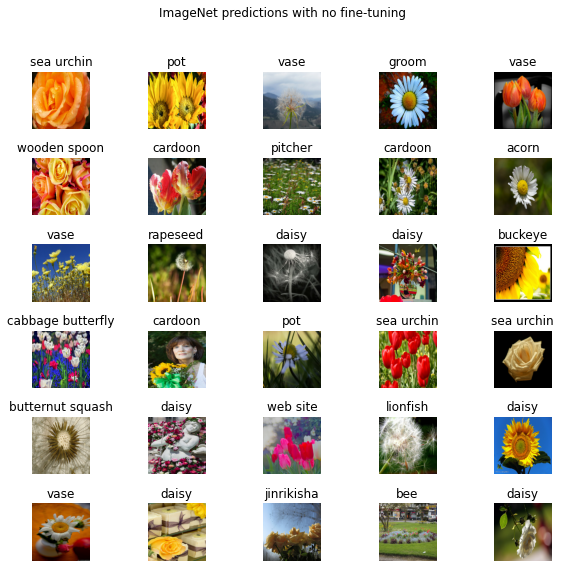

In [38]:
result_batch = model.predict(train_ds)
predicted_class_names = imagenet_labels[tf.math.argmax(result_batch, axis=-1)]

plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)
for n in range(30):
  plt.subplot(6,5,n+1)
  plt.imshow(image_batch[n])
  plt.title(predicted_class_names[n])
  plt.axis('off')
_ = plt.suptitle("ImageNet predictions with no fine-tuning")

In [40]:
feature_extractor_model = classifier_model

feature_extractor_layer = hub.KerasLayer(
    feature_extractor_model,
    input_shape=(224, 224, 3),
    trainable=False)

In [41]:
NUM_CLASSES = len(class_names)

model = tf.keras.Sequential([
  feature_extractor_layer,
  tf.keras.layers.Dense(NUM_CLASSES)
])

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_9 (KerasLayer)  (None, 1001)              60382697  
                                                                 
 dense (Dense)               (None, 5)                 5010      
                                                                 
Total params: 60,387,707
Trainable params: 5,010
Non-trainable params: 60,382,697
_________________________________________________________________


#### Train model

In [42]:
NUM_EPOCHS = 10

model.compile(
  optimizer=tf.keras.optimizers.Adam(),
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

history = model.fit(train_ds,
                    validation_data=val_ds,
                    epochs=NUM_EPOCHS).history

Epoch 1/10
23/23 [==============================] - 37s 1s/step - loss: 1.1370 - acc: 0.6063 - val_loss: 0.6708 - val_acc: 0.7602
Epoch 2/10
23/23 [==============================] - 23s 1s/step - loss: 0.5499 - acc: 0.8069 - val_loss: 0.5243 - val_acc: 0.8134
Epoch 3/10
23/23 [==============================] - 23s 1s/step - loss: 0.4299 - acc: 0.8450 - val_loss: 0.4558 - val_acc: 0.8501
Epoch 4/10
23/23 [==============================] - 23s 1s/step - loss: 0.3688 - acc: 0.8648 - val_loss: 0.4232 - val_acc: 0.8638
Epoch 5/10
23/23 [==============================] - 23s 1s/step - loss: 0.3297 - acc: 0.8804 - val_loss: 0.4044 - val_acc: 0.8719
Epoch 6/10
23/23 [==============================] - 24s 1s/step - loss: 0.3003 - acc: 0.8937 - val_loss: 0.3920 - val_acc: 0.8706
Epoch 7/10
23/23 [==============================] - 24s 1s/step - loss: 0.2771 - acc: 0.9036 - val_loss: 0.3834 - val_acc: 0.8760
Epoch 8/10
23/23 [==============================] - 24s 1s/step - loss: 0.2581 - acc: 0.91

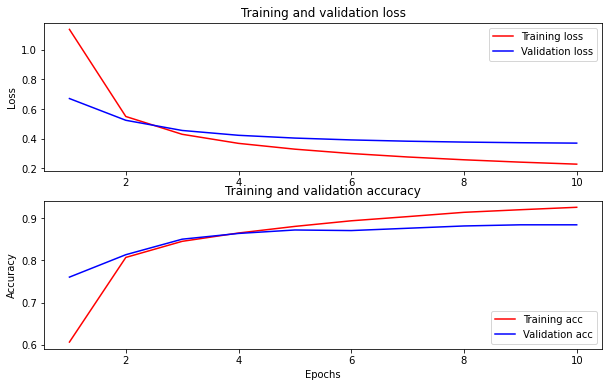

In [43]:
acc = history['acc']
val_acc = history['val_acc']
loss = history['loss']
val_loss = history['val_loss']

epochs = range(1, len(acc) + 1)
fig = plt.figure(figsize=(10, 6))
fig.tight_layout()

plt.subplot(2, 1, 1)
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
# plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

#### Check predictions

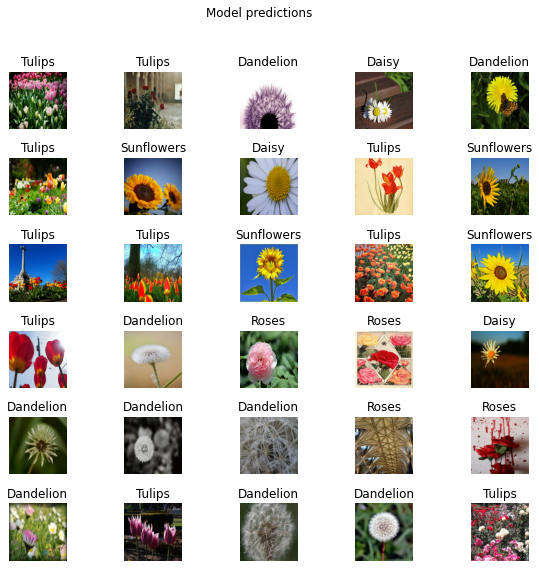

In [44]:
image_batch, labels = next(iter(val_ds))

predicted_batch = model.predict(image_batch)

predicted_id = tf.math.argmax(predicted_batch, axis=-1)
predicted_label_batch = class_names[predicted_id]

plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)

for n in range(30):
  plt.subplot(6,5,n+1)
  plt.imshow(image_batch[n])
  plt.title(predicted_label_batch[n].title())
  plt.axis('off')
_ = plt.suptitle("Model predictions")

### Transfer Learning Using Teachable Machine

In [ ]:
from keras.models import load_model
from PIL import Image, ImageOps
import numpy as np

# Load the model
model = load_model('keras_model.h5')

# Create the array of the right shape to feed into the keras model
# The 'length' or number of images you can put into the array is
# determined by the first position in the shape tuple, in this case 1.
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)
# Replace this with the path to your image
image = Image.open('/content/test5.jpg')
#resize the image to a 224x224 with the same strategy as in TM2:
#resizing the image to be at least 224x224 and then cropping from the center
size = (224, 224)
image = ImageOps.fit(image, size, Image.ANTIALIAS)

#turn the image into a numpy array
image_array = np.asarray(image)
# Normalize the image
normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1
# Load the image into the array
data[0] = normalized_image_array

# run the inference
prediction = model.predict(data)
print(prediction)


### Activity: Transfer Learning Using Teachabl Machine

In [ ]:
from keras.models import load_model
from PIL import Image, ImageOps
import numpy as np

# Load the model
model = load_model('keras_model.h5')

# Create the array of the right shape to feed into the keras model
# The 'length' or number of images you can put into the array is
# determined by the first position in the shape tuple, in this case 1.
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)
# Replace this with the path to your image
image = Image.open('______________________')
#resize the image to a 224x224 with the same strategy as in TM2:
#resizing the image to be at least 224x224 and then cropping from the center
size = (224, 224)
image = ImageOps.fit(image, size, Image.ANTIALIAS)

#turn the image into a numpy array
image_array = np.asarray(image)
# Normalize the image
normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1
# Load the image into the array
data[0] = normalized_image_array

# run the inference
prediction = model.predict(data)
print(prediction)


## Topic 4.2 Time Series Forecasting with Recurrent Neural Network (RNN)


### RNN/LSTM/GRU and Input Parameters

In [ ]:
import tensorflow as tf 
import numpy as np

batch = 5 
feature = 10 # could be the embedding size
hidden_size = 20 
timesteps = 3 # sequence length 

inputs = np.random.randn(batch, timesteps, feature)
rnn = tf.keras.layers.SimpleRNN(hidden_size)

h_out = rnn(inputs)
print('Output size (batch, hidden_size) = ', h_out.shape)

In [ ]:
import tensorflow as tf 

batch = 5 
feature = 10 # could be the embedding size
hidden_size = 20 
timesteps = 3 # sequence length 

inputs = np.random.randn(batch, timesteps, feature)
lstm = tf.keras.layers.LSTM(hidden_size)

h_out = lstm(inputs)
print('Output size (batch, hidden_size) = ', h_out.shape)

In [ ]:
import tensorflow as tf 

batch = 5 
feature = 10 # could be the embedding size
hidden_size = 20 
timesteps = 3 # sequence length 

inputs = np.random.randn(batch, timesteps, feature)
gru = tf.keras.layers.GRU(hidden_size)

h_out = gru(inputs)
print('Output size (batch, hidden_size) = ', h_out.shape)

### Time Series Forcasting with RNN

#### Stock Price Prediction

##### Step 1: Preprocess the Data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import yfinance as yf

In [ ]:
# stock_dataset = pd.read_csv('https://raw.githubusercontent.com/tertiarycourses/datasets/master/DBS.csv',usecols=['Date','Close'])

start_date = '2021-06-01'
end_date = '2021-11-30'
ticker = 'D05.SI'
stock_dataset = yf.download(ticker,start=start_date, end=end_date)

stock_dataset.head(10)

In [ ]:
stock_dataset.describe()

In [ ]:
#dataset = stock_dataset.iloc[:,1:2].values

dataset = stock_dataset['Close'].values
dataset = dataset[..., tf.newaxis]

plt.plot(dataset)
plt.xlabel('Day')
plt.ylabel('Stock Market Price')
plt.show()

In [ ]:
def sliding_window(data, seq_length):
    x = []
    y = []

    for i in range(len(data)-seq_length-1):
        _x = data[i:(i+seq_length)]
        _y = data[i+seq_length]
        x.append(_x)
        y.append(_y)

    return np.array(x),np.array(y)

In [ ]:
sc = MinMaxScaler()
dataset = sc.fit_transform(dataset)

timesteps = 4
X,y = sliding_window(dataset, timesteps)

In [ ]:
train_size = int(len(y) * 0.67)
test_size = int(len(y)) - train_size

In [ ]:
X_train = X[0:train_size]
y_train = y[0:train_size]

X_test = X[train_size:len(X)]
y_test = y[train_size:len(y)]

In [ ]:
feature = 1
hidden_size = 5
input_size = 1

# inputs: A 3D tensor with shape [batch, timesteps, feature].
X_train = np.reshape(X_train, (X_train.shape[0], timesteps, input_size))
X_test = np.reshape(X_test, (X_test.shape[0], timesteps, 1, input_size))


##### Step 2: Define the Model

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense

model = Sequential()
model.add(LSTM(hidden_size, activation='tanh',input_shape=(timesteps,feature)))
model.add(Dense(1,activation='linear'))

##### Step 3: Loss Function and Optimizer

In [ ]:
ADAM = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='mse', optimizer=ADAM)

##### Step 4: Train the Model

In [ ]:
history = model.fit(X_train, y_train, epochs=1000)

##### Step 5: Evaluate the Model

In [ ]:
loss = history.history['loss']
epoch = range(len(loss))

import matplotlib.pyplot as plt

plt.plot(epoch,loss)
plt.xlabel('Epoch')
plt.ylabel('Loss]')
plt.show()

In [ ]:
yhat = model(X)

yhat = sc.inverse_transform(yhat)
y_ = sc.inverse_transform(y)

plt.axvline(x=train_size, c='g', linestyle='--')

plt.plot(y_,'b',label='actual')
plt.plot(yhat,'r',label='prediction')
plt.xlabel('Month')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

### Impact of Learning Rate

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense

model = Sequential()
model.add(LSTM(hidden_size, activation='tanh',input_shape=(timesteps,feature)))
model.add(Dense(1,activation='linear'))

ADAM = tf.keras.optimizers.Adam(learning_rate=0.2)
model.compile(loss='mse', optimizer=ADAM)

history = model.fit(X_train, y_train, epochs=1000)

loss = history.history['loss']
epoch = range(len(loss))

import matplotlib.pyplot as plt

plt.plot(epoch,loss)
plt.xlabel('Epoch')
plt.ylabel('Loss]')
plt.show()

yhat = model(X)

yhat = sc.inverse_transform(yhat)
y_ = sc.inverse_transform(y)

plt.axvline(x=train_size, c='g', linestyle='--')

plt.plot(y_,'b',label='actual')
plt.plot(yhat,'r',label='prediction')
plt.xlabel('Month')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

### Impact of Sequence Length

In [ ]:
sc = MinMaxScaler()
dataset = sc.fit_transform(dataset)

timesteps = 4
X,y = sliding_window(dataset, timesteps)

train_size = int(len(y) * 0.67)
test_size = int(len(y)) - train_size

X_train = X[0:train_size]
y_train = y[0:train_size]

X_test = X[train_size:len(X)]
y_test = y[train_size:len(y)]

feature = 1
hidden_size = 5
input_size = 1

# inputs: A 3D tensor with shape [batch, timesteps, feature].
X_train = np.reshape(X_train, (X_train.shape[0], timesteps, input_size))
X_test = np.reshape(X_test, (X_test.shape[0], timesteps, 1, input_size))

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense

model = Sequential()
model.add(LSTM(hidden_size, activation='tanh',input_shape=(timesteps,feature)))
model.add(Dense(1,activation='linear'))

ADAM = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='mse', optimizer=ADAM)

history = model.fit(X_train, y_train, epochs=1000)

loss = history.history['loss']
epoch = range(len(loss))

import matplotlib.pyplot as plt

plt.plot(epoch,loss)
plt.xlabel('Epoch')
plt.ylabel('Loss]')
plt.show()

yhat = model(X)

yhat = sc.inverse_transform(yhat)
y_ = sc.inverse_transform(y)

plt.axvline(x=train_size, c='g', linestyle='--')

plt.plot(y_,'b',label='actual')
plt.plot(yhat,'r',label='prediction')
plt.xlabel('Month')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

### Impact of Hidden Size

In [ ]:
sc = MinMaxScaler()
dataset = sc.fit_transform(dataset)

timesteps = 4
X,y = sliding_window(dataset, timesteps)

train_size = int(len(y) * 0.67)
test_size = int(len(y)) - train_size

X_train = X[0:train_size]
y_train = y[0:train_size]

X_test = X[train_size:len(X)]
y_test = y[train_size:len(y)]

feature = 1
hidden_size = 2
input_size = 1

# inputs: A 3D tensor with shape [batch, timesteps, feature].
X_train = np.reshape(X_train, (X_train.shape[0], timesteps, input_size))
X_test = np.reshape(X_test, (X_test.shape[0], timesteps, 1, input_size))

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense

model = Sequential()
model.add(LSTM(hidden_size, activation='tanh',input_shape=(timesteps,feature)))
model.add(Dense(1,activation='linear'))

ADAM = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='mse', optimizer=ADAM)

history = model.fit(X_train, y_train, epochs=1000)

loss = history.history['loss']
epoch = range(len(loss))

import matplotlib.pyplot as plt

plt.plot(epoch,loss)
plt.xlabel('Epoch')
plt.ylabel('Loss]')
plt.show()

yhat = model(X)

yhat = sc.inverse_transform(yhat)
y_ = sc.inverse_transform(y)

plt.axvline(x=train_size, c='g', linestyle='--')

plt.plot(y_,'b',label='actual')
plt.plot(yhat,'r',label='prediction')
plt.xlabel('Month')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

#### Activity: Stock Market Forecasting

##### Step 1: Preprocess the Data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [ ]:
#stock_dataset = pd.read_csv('https://raw.githubusercontent.com/tertiarycourses/datasets/master/AAPL.csv',usecols=['Date','Close'])

start_date = '2021-06-01'
end_date = '2021-11-30'
ticker = 'AAPL'
stock_dataset = yf.download(ticker,start=start_date, end=end_date)

stock_dataset.head(10)


In [ ]:
stock_dataset.describe()

In [ ]:
# dataset = stock_dataset.iloc[:,1:2].values

dataset = stock_dataset['Close'].values
dataset = dataset[..., tf.newaxis]

plt.plot(dataset)
plt.xlabel('Day')
plt.ylabel('Stock Market Price')
plt.show()

In [ ]:
def sliding_window(data, seq_length):
    x = []
    y = []

    for i in range(len(data)-seq_length-1):
        _x = data[i:(i+seq_length)]
        _y = data[i+seq_length]
        x.append(_x)
        y.append(_y)

    return np.array(x),np.array(y)

In [ ]:
sc = MinMaxScaler()
dataset = sc.fit_transform(dataset)

timesteps = 4
X,y = sliding_window(dataset, timesteps)

In [ ]:
train_size = int(len(y) * 0.67)
test_size = int(len(y)) - train_size

In [ ]:
X_train = X[0:train_size]
y_train = y[0:train_size]

X_test = X[train_size:len(X)]
y_test = y[train_size:len(y)]

In [ ]:
feature = 1
hidden_size = 5
input_size = 1

# inputs: A 3D tensor with shape [batch, timesteps, feature].
X_train = np.reshape(X_train, (X_train.shape[0], timesteps, input_size))
X_test = np.reshape(X_test, (X_test.shape[0], timesteps, 1, input_size))


##### Step 2 Define the Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense

model = Sequential()
model.add(LSTM(hidden_size, activation='tanh',input_shape=(timesteps,feature)))
model.add(Dense(1,activation='linear'))

##### Step 3: Loss Function and Optimizer

In [ ]:
model.compile(loss='mse', optimizer='adam')

##### Step 4: Train the Model

In [ ]:
history = model.fit(X_train, y_train, epochs=1000)

##### Step 5: Evaluate teh Model

In [ ]:
loss = history.history['loss']
epoch = range(len(loss))

import matplotlib.pyplot as plt

plt.plot(epoch,loss)
plt.xlabel('Epoch')
plt.ylabel('Loss]')
plt.show()

In [ ]:
yhat = model(X)

yhat = sc.inverse_transform(yhat)
y_ = sc.inverse_transform(y)

plt.axvline(x=train_size, c='g', linestyle='--')

plt.plot(y_,'b',label='actual')
plt.plot(yhat,'r',label='prediction')
plt.xlabel('Month')
plt.ylabel('Stock Price')
plt.legend()
plt.show()